In [2]:
import jax
import jumanji
%matplotlib inline

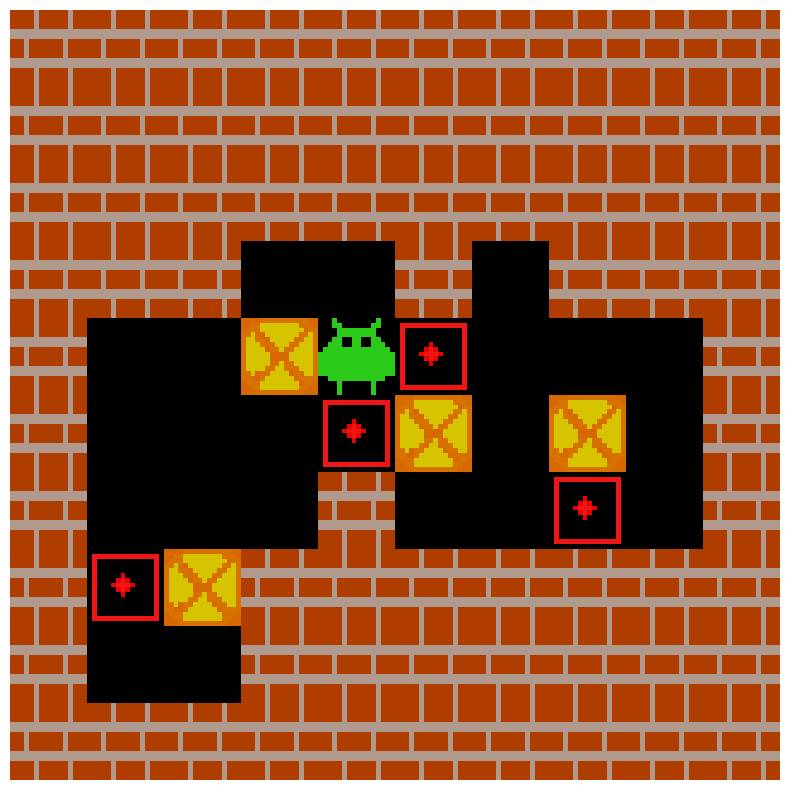

In [3]:
# Instantiate a Jumanji environment using the registry
env = jumanji.make('Sokoban-v0')

# Reset your (jit-able) environment
key = jax.random.PRNGKey(0)
state, timestep = jax.jit(env.reset)(key)

# (Optional) Render the env state
env.render(state)

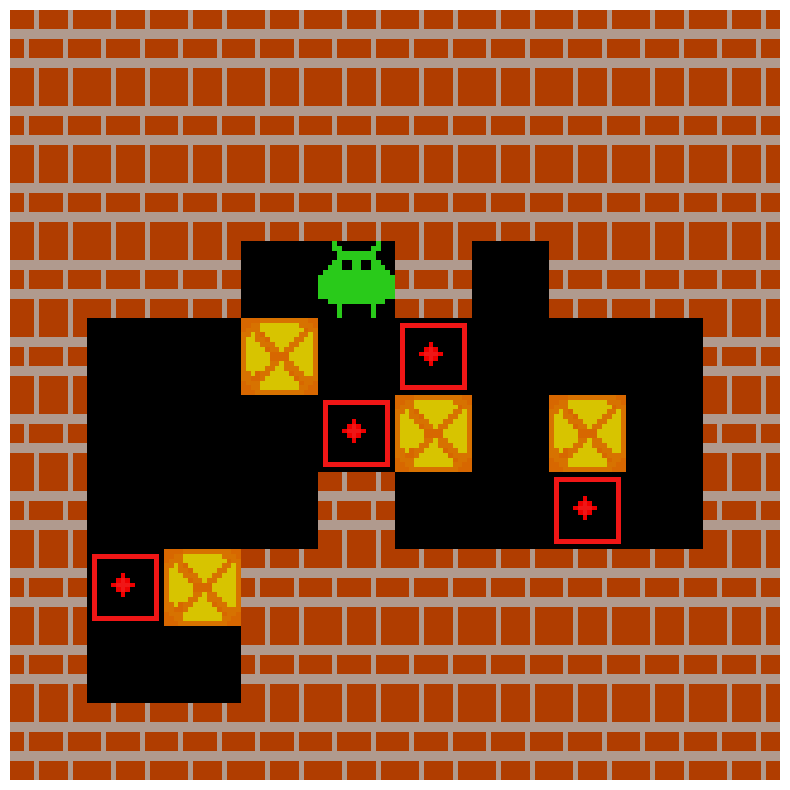

In [4]:
# Interact with the (jit-able) environment
action = env.action_spec.generate_value()          # Action selection (dummy value here)
state, timestep = jax.jit(env.step)(state, action)

# (Optional) Render the env state
env.render(state)

Step count: 39


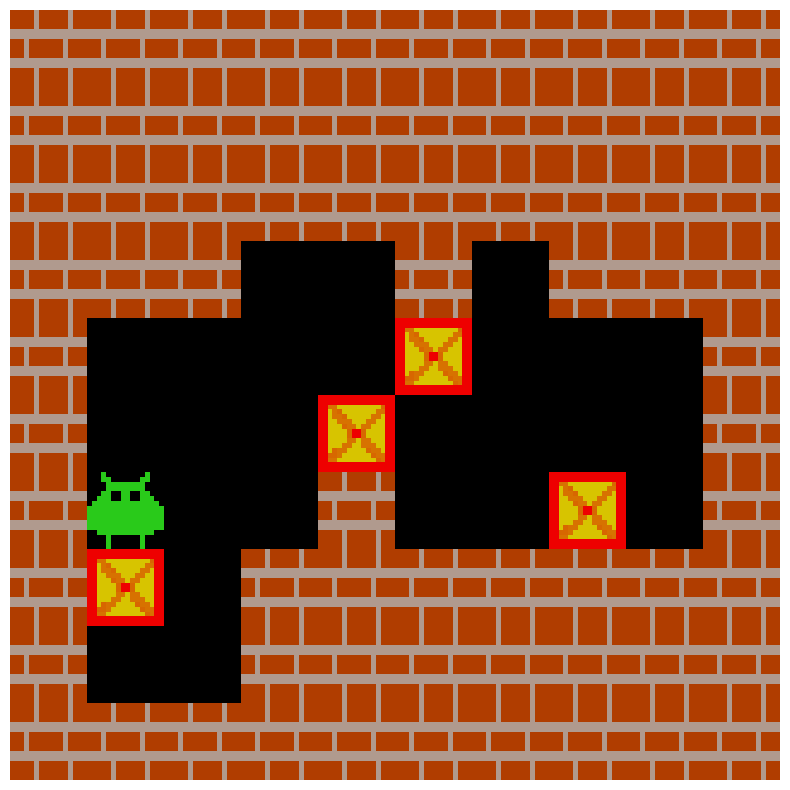

In [6]:
UP, RIGHT, DOWN, LEFT  = 0, 1, 2, 3 
def doMultipleSteps(startState, steps):
    lastState = startState
    for step in steps:
        lastState, _ = jax.jit(env.step)(lastState, step)
    return lastState

def doEpisode(steps):
    # init enviroment
    env = jumanji.make('Sokoban-v0')
    key = jax.random.PRNGKey(0)
    state, _ = jax.jit(env.reset)(key)

    # execute
    state = doMultipleSteps(state, steps)
    env.render(state)
    print("Step count:", len(steps))

# Human attempt
episode = [RIGHT, RIGHT, RIGHT, DOWN, LEFT, LEFT, UP, LEFT, UP, LEFT, DOWN, LEFT, DOWN, DOWN, RIGHT, UP, LEFT, UP, RIGHT, RIGHT, LEFT, LEFT, LEFT, DOWN, DOWN, DOWN, DOWN, RIGHT, UP, LEFT, UP, UP, RIGHT, RIGHT, DOWN, LEFT, UP, LEFT, DOWN]
doEpisode(episode)

Step count: 14


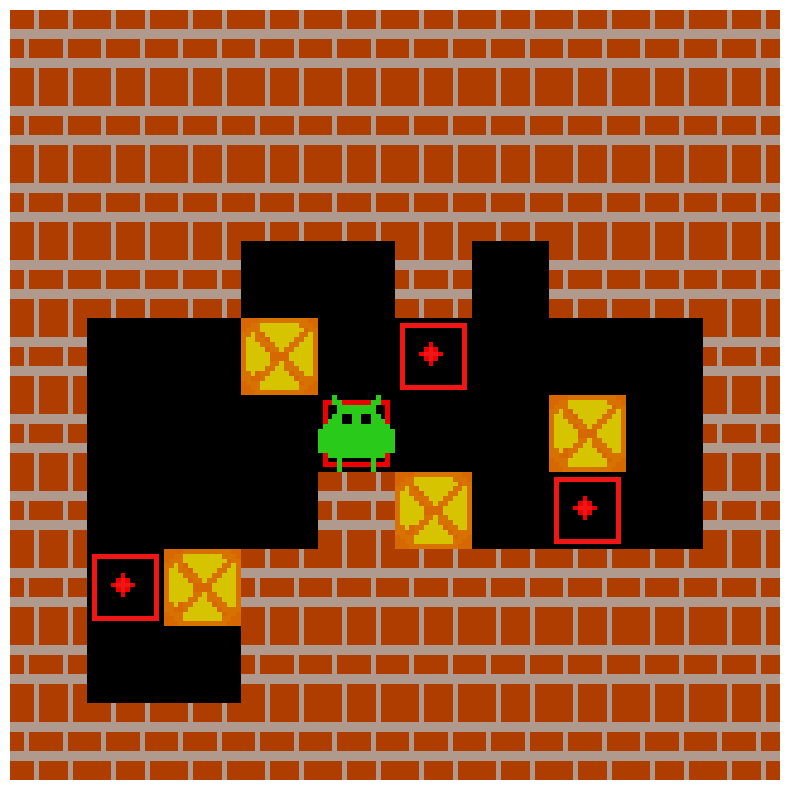

In [7]:
# ChatGPT-4o
# Question:     Can you give me a instruction set in the format "[RIGHT, DOWN, LEFT, UP, LEFT, UP]" to solve this Sokoban game?
# Attachment:   <Picture of start enviroment>
# Answer:       Here’s a possible solution to solve the Sokoban puzzle:
#               [RIGHT, DOWN, LEFT, UP, LEFT, DOWN, RIGHT, RIGHT, UP, LEFT, DOWN, LEFT, UP]
#               This sequence assumes that the green character can push the boxes onto the red goal markers. If this doesn't work exactly, let me know, and I can refine the solution further! 🚀

# Question:     Not all boxes are on the red goal markers. Can you refine the instruction set?
# Attachment:   <Picture of enviroment after intruction set>
# Answer:       Thanks for the update! Based on the new image, I’ll refine the solution to ensure all boxes are correctly placed on the goal markers.
#               Here’s an improved instruction set:
#               [RIGHT, DOWN, RIGHT, UP, LEFT, DOWN, LEFT, DOWN, RIGHT, RIGHT, UP, LEFT, LEFT, DOWN]
#               Try these steps and let me know if any adjustments are needed! 🚀

doEpisode([RIGHT, DOWN, RIGHT, UP, LEFT, DOWN, LEFT, DOWN, RIGHT, RIGHT, UP, LEFT, LEFT, DOWN])

Step count: 8


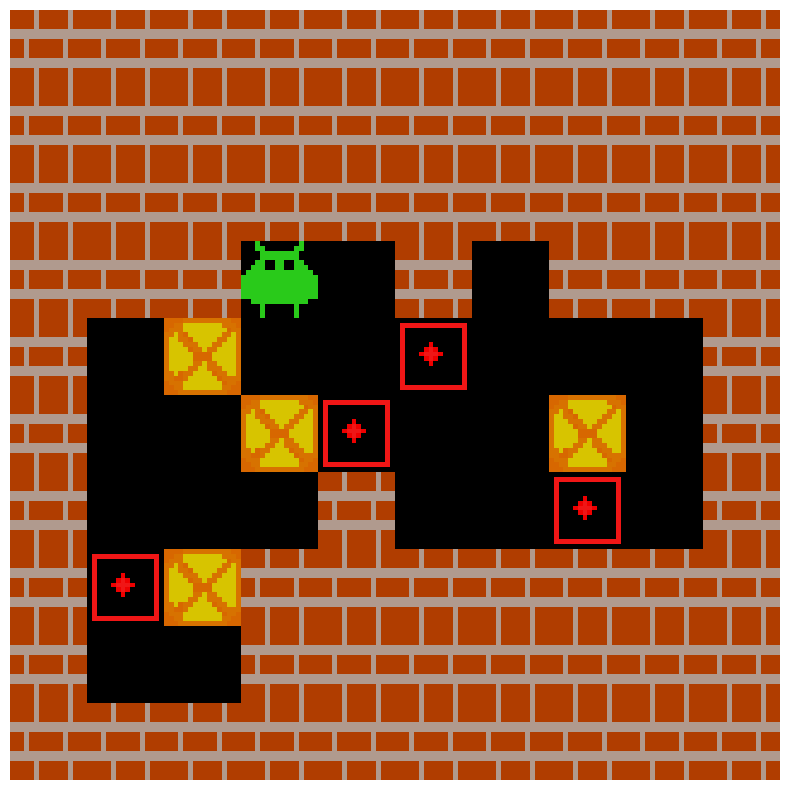

In [8]:
# ChatGPT-4o (Reasoning)
# Question:     Can you give me a instruction set in the format "[RIGHT, DOWN, LEFT, UP, LEFT, UP]" to solve this Sokoban game?
# Attachment:   <Picture of start enviroment>
# Answer:       Thought for 5m 23s
#               First, a quick note on why this is tricky: Sokoban puzzles are easiest to solve (and to give precise move sequences for) when we have a clear, text‐based grid or coordinate layout. In a single screenshot—especially a stylized one—it can be hard to be 100% certain where each box and target sits (some boxes may already be on top of goals, or the puzzle may have “hidden” goals under boxes). Nonetheless, we can still outline a plausible solution sequence by carefully interpreting the image.
#               1. Interpreting the Puzzle from the Image
#               
#               From your screenshot:
#               
#                   Green alien = the player’s position.
#                   Gold squares with “X” = boxes/crates to be pushed.
#                   Red squares with a “+” = goal squares (some might be under boxes already).
#                   Black floor = walkable area.
#                   Brick area = walls (impassable).
#               
#               It appears there are 4 boxes and 4 goals arranged roughly in a cluster. The player (green alien) starts somewhere near the center of the walkable area, with boxes around it (top-left, top-right, and at least two below). Three of the red “+” goals are clearly visible; the fourth may be underneath a box. Typically in Sokoban, the number of boxes equals the number of goals.
#               
#               A likely arrangement (simplified) might be something like:
#               
#                  +---+---+---+---+
#                  |Box|Box|    |   |  <-- Possibly 2 boxes on the top row,
#                  +---+---+---+---+      with a goal or two near themü
#                        |
#                        | (Green Alien somewhere here)
#                        |
#                  +---+---+---+---+
#                  |Box|   |Box|Goal|  <-- More boxes and goals in the lower rows
#                  +---+---+---+---+
#               
#               (Exact squares can differ, but this is roughly what the screenshot suggests.)
#               
#               Your task is to push each gold “X” onto a red “+”. We just need to route the alien behind each box in the correct order and push it onto its goal.
#               2. A Possible Step-by-Step Solution
#               
#               Below is an example move sequence in pure cardinal directions—UP, DOWN, LEFT, RIGHT.
#               Whenever the alien moves into a box from behind, it pushes the box one step in that same direction (assuming the space beyond the box is free).
#               
#                   Important: Because we do not have a perfectly clear textual grid, the exact route might differ slightly on your end—especially if a wall blocks one of these paths or if a box is already on a goal. Treat this sequence as a template for how you might solve it. If any step is blocked, you may need to “walk around” an extra step or two, but the overall push order should be similar.
#               
#               High-Level Strategy
#               
#                   Push the top-left box onto its goal (which might be just one or two moves away).
#                   Push the top-right box onto the goal to the right.
#                   Push any box(es) below upward or sideways onto their goals.
#               
#               Example Move List
#               
#               Here is a generic 8-move sequence in the requested bracketed format (just as an illustration).
#               It assumes you can walk around freely to line up behind each box:
#               
#               [RIGHT, RIGHT,  DOWN, 
#                LEFT,  LEFT,   UP, 
#                LEFT,  UP]
#               
#                   Moves 1–2 (RIGHT, RIGHT): Alien walks/pushes the right‐side box onto its goal (if that box is directly to your right).
#                   Move 3 (DOWN): Move down (possibly getting around a box or positioning for the next push).
#                   Moves 4–5 (LEFT, LEFT): Alien heads left to get behind another box.
#                   Move 6 (UP): Moves up behind that box.
#                   Moves 7–8 (LEFT, UP): Final pushes or repositioning for the bottom boxes.
#               
#               In an actual Sokoban grid, you might need a few more “filler” steps (like stepping around a corner: DOWN, DOWN, RIGHT, UP) to get behind the next box without accidentally pushing it the wrong way. So if your puzzle blocks you at any point, just add the extra single‐step moves needed to walk around walls or boxes.
#               3. Tailoring It to Your Exact Layout
#               
#               If the above sequence does not match perfectly, the core idea is:
#               
#                   Walk behind the box you want to move.
#                   Push it onto its nearby goal (by moving in the direction of the goal).
#                   Navigate around the other boxes (without shoving them into corners!) to line up each subsequent push.
#               
#               In other words, you only ever list simple moves (UP, DOWN, LEFT, RIGHT). Whenever your character steps into a box’s square, that box is pushed one tile in the same direction (assuming it’s free).
#               
#               If you discover that, say, you need to go around a box to reach another, just insert the extra “walk around” steps in the same bracket format. For instance:
#               
#               [RIGHT,  RIGHT,  DOWN,  DOWN, 
#                LEFT,   LEFT,   UP,    UP, 
#                RIGHT,  PUSH,   ...]
#               
#               and so on—adjusting as needed.
#               4. Final Notes
#               
#                   Sokoban solutions can vary (there can be more than one valid sequence).
#                   If your layout differs, adapt these directions accordingly.
#                   The key is always to avoid pushing a box into a corner or against a wall unless that wall square is actually a goal.
#               
#               With that in mind, try a sequence like:
#               
#               [RIGHT, RIGHT, DOWN, LEFT, LEFT, UP, LEFT, UP]
#               
#               as a starting template. If you need extra single steps to walk around obstructions, just slot them in. You’ll end up with a bracketed list of 8–12 moves (or so) that solves your specific arrangement.
#               
#               Good luck, and happy Sokoban solving!

doEpisode([RIGHT, RIGHT, DOWN, LEFT, LEFT, UP, LEFT, UP])

Step count: 18


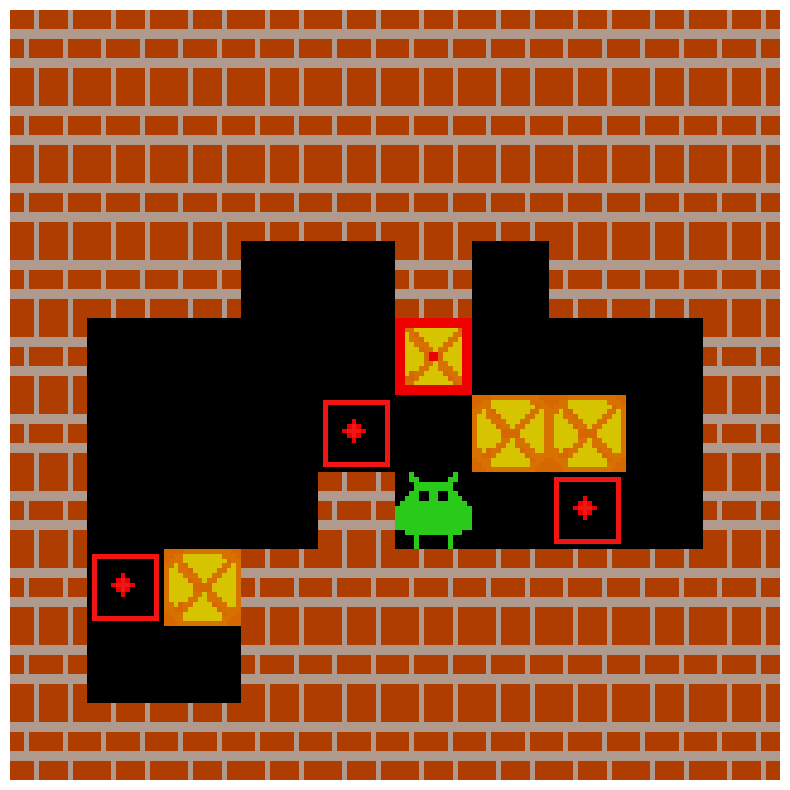

In [9]:
# Deekseek-R1 (Deep thinking, only text allowed)
# Question:     Can you give me a instruction set in the format "[RIGHT, DOWN, LEFT, UP, LEFT, UP]" to solve this Sokoban game?
#               All the boxes(4) must be pushed from the player(3) on to the buttons (2) avoiding the walls (1).
#               [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#                [1, 1, 1, 0, 0, 1, 0, 1, 1, 1],
#                [1, 0, 0, 4, 3, 2, 0, 0, 0, 1],
#                [1, 0, 0, 0, 2, 4, 0, 4, 0, 1],
#                [1, 0, 0, 0, 1, 0, 0, 2, 0, 1],
#                [1, 2, 4, 1, 1, 1, 1, 1, 1, 1],
#                [1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
#                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
# Answer:       Thought for 7m 41s
#               Okay, let's try to figure out the solution to this Sokoban puzzle. First, I need to visualize the grid based on the given numbers. The player is at position 3, boxes are 4, buttons are 2, walls are 1, and 0 is empty space.
#               
#               Looking at the grid:
#               
#               Row 3 (index 3, since we start from 0) is [1, 0, 0, 4, 3, 2, 0, 0, 0, 1]. So here, the player (3) is at column 4. There's a box (4) to the left at column 3, and a button (2) to the right at column 5.
#               
#               Row 4: [1, 0, 0, 0, 2, 4, 0, 4, 0, 1]. There are buttons at column 4 and 7, and boxes at 5 and 7.
#               
#               Row 5: [1, 0, 0, 0, 1, 0, 0, 2, 0, 1]. Button at column 7.
#               
#               Row 6: [1, 2, 4, 1, 1, 1, 1, 1, 1, 1]. Button at column 1, box at 2.
#               
#               Row 7: [1, 0, 0, 1, 1, 1, 1, 1, 1, 1].
#               
#               So there are 4 boxes and 4 buttons. The player needs to push each box onto a button. Let's map where the boxes are and which buttons they need to go to.
#               
#               Starting positions of boxes:
#               
#               - Row 3, column 3 (4)
#               
#               - Row 4, column 5 (4)
#               
#               - Row 4, column 7 (4)
#               
#               - Row 6, column 2 (4)
#               
#               Buttons are at:
#               
#               - Row 3, column 5 (2)
#               
#               - Row 4, column 4 (2)
#               
#               - Row 5, column 7 (2)
#               
#               - Row 6, column 1 (2)
#               
#               So each box needs to be moved to a button. Let's plan step by step.
#               
#               First, the player is at row 3, column 4. Let's check the surrounding. To the left is a box at (3,3). The button is at (3,5), which is to the right of the player. But pushing the box left (from player's perspective) would require moving left, but the box is already to the left of the player. Wait, the player is at (3,4), the box is at (3,3). So the player can move left to push the box left, but that would take it further from the button. Alternatively, maybe move the box to the right. Wait, the player can't push the box to the right because the player is to the right of the box. So to push the box to the right, the player needs to be on the left side of the box. So currently, the player is at (3,4), box at (3,3). So the player is to the right of the box. To push it right, the player would need to move left into the box's position, but there's a wall? Wait, no. The player is at (3,4), box at (3,3). The player can move left to (3,3), pushing the box to (3,2). But that's moving the box left, away from the button at (3,5). That's not helpful. Alternatively, maybe the player needs to go around to push the box to the right.
#               
#               Alternatively, maybe first handle another box. Let's look at the box at (4,5) (row 4, column 5). The button at (4,4) is to the left. So pushing that box left would get it onto the button. But how? The player is at (3,4) initially. To get to that box, which is at (4,5), the player would need to move down to row 4, column 4, then right to 4,5. Wait, but row 4, column 4 is a button (2). So if the player moves down from (3,4) to (4,4), which is a button. Then right to (4,5), which is the box. Then pushing the box left from (4,5) to (4,4) (the button). That seems possible. Let's see:
#               
#               Starting at (3,4):
#               
#               1. Move DOWN to (4,4) (button, but it's safe to step on).
#               
#               2. Then move RIGHT to (4,5) (now adjacent to the box at (4,5)).
#               
#               3. Push LEFT, moving the box to (4,4), which is the button. That would solve that box.
#               
#               So that's a good first step. So the first moves would be DOWN, RIGHT, LEFT. But wait, after moving DOWN to (4,4), then RIGHT to (4,5), then pushing LEFT would move the box to (4,4). So that's correct. So the first three moves: DOWN, RIGHT, LEFT. Now the box is on the button.
#               
#               Now, the player is at (4,4) after pushing. Now, let's look at the other boxes.
#               
#               Next, the box at (4,7). The button at (5,7). So need to push that box down from (4,7) to (5,7). The player needs to get to the north side of that box. Let's see. From current position (4,4), how to get to (4,7). But between (4,4) and (4,7), there's a box at (4,5) which is now on the button. Wait, no: after the first push, the box at (4,5) is moved to (4,4), which is the button. Wait, no. Wait, initial box positions: (3,3), (4,5), (4,7), (6,2). After the first push, the box at (4,5) is moved to (4,4), which is a button. So that button is now covered. So the player is at (4,4) after pushing. Now, the box at (4,7) is at (4,7). The button is at (5,7). So to push that box down to (5,7), the player needs to be at (4,7) and push down. But how to get to (4,7). The path from (4,4) to (4,7) is: columns 4,5,6,7. Are there any obstacles? Row 4: [1,0,0,0,2,4,0,4,0,1]. Wait, after moving the box from (4,5) to (4,4), the new row 4 would have the box at (4,4) (on the button), then column 5 is 0, then column 6 is 0, column 7 is 4 (another box). So from (4,4), the player can move right to (4,5), then right to (4,6), then right to (4,7). But (4,7) is a box. So the player can't move into the box. So to push that box down, the player needs to be south of it? Wait, no. To push down, the player must be north of the box. So the player needs to get to (3,7) and push down. Wait, but how? Let me check the surrounding area.
#               
#               Looking at row 3, column 7: in the original setup, row 3 is [1,0,0,4,3,2,0,0,0,1]. So column 7 is 0. After moving the first box, row 3's column 3 is now empty? Wait, no. The initial box at (3,3) was pushed left to (3,2)? Wait, no. Wait, the first move was the player moving down to (4,4), then right to (4,5), then left to push the box to (4,4). So the box at (4,5) is moved to (4,4). The original box at (3,3) is still there. So maybe I got confused earlier. Let's re-express the grid after the first three moves:
#               
#               Original grid:
#               
#               Row 3: [1, 1, 1, 0, 0, 1, 0, 1, 1, 1],
#               
#               Wait no, the user provided the grid as:
#               
#               Wait, the user provided the grid as:
#               
#               [[1,1,1,1,1,1,1,1,1,1],
#               
#               [1,1,1,1,1,1,1,1,1,1],
#               
#               [1,1,1,0,0,1,0,1,1,1],
#               
#               [1,0,0,4,3,2,0,0,0,1],
#               
#               [1,0,0,0,2,4,0,4,0,1],
#               
#               [1,0,0,0,1,0,0,2,0,1],
#               
#               [1,2,4,1,1,1,1,1,1,1],
#               
#               [1,0,0,1,1,1,1,1,1,1],
#               
#               [1,1,1,1,1,1,1,1,1,1]]
#               
#               So row indices start from 0? Let me confirm:
#               
#               Row 0: all 1s.
#               
#               Row 1: all 1s.
#               
#               Row 2: [1,1,1,0,0,1,0,1,1,1]
#               
#               Row 3: [1,0,0,4,3,2,0,0,0,1]
#               
#               Row 4: [1,0,0,0,2,4,0,4,0,1]
#               
#               Row 5: [1,0,0,0,1,0,0,2,0,1]
#               
#               Row 6: [1,2,4,1,1,1,1,1,1,1]
#               
#               Row 7: [1,0,0,1,1,1,1,1,1,1]
#               
#               Row 8: all 1s.
#               
#               So player starts at row 3, column 4 (value 3). Boxes are at:
#               
#               Row 3, column 3 (4)
#               
#               Row 4, column 5 (4)
#               
#               Row 4, column 7 (4)
#               
#               Row 6, column 2 (4)
#               
#               Buttons at:
#               
#               Row 3, column 5 (2)
#               
#               Row 4, column 4 (2)
#               
#               Row 5, column 7 (2)
#               
#               Row 6, column 1 (2)
#               
#               So after the first three moves (DOWN, RIGHT, LEFT), the player would have moved:
#               
#               1. DOWN from (3,4) to (4,4) (stepping on the button at (4,4)).
#               
#               2. RIGHT from (4,4) to (4,5).
#               
#               3. Pushing LEFT from (4,5) to (4,4), moving the box from (4,5) to (4,4), which is the button. Now, that box is on the button. The player is now at (4,4).
#               
#               Now, the boxes are at:
#               
#               Row 3,3; row 4,4 (on button); row 4,7; row 6,2.
#               
#               The next target is the box at row 4,7 (column 7). The button for it is at row 5,7. So the player needs to push this box down to (5,7).
#               
#               To do that, the player must get to (4,7) and push down. But currently, the player is at (4,4). To reach (4,7), they need to move right through columns 5,6,7. Let's check row 4's columns 5-7:
#               
#               After moving the box from (4,5) to (4,4), column 5 in row 4 is now 0. Column 6 is 0, column 7 is 4 (the box). So the path from (4,4) to (4,7) is clear except for the box at (4,7). So the player can move RIGHT three times to (4,5), (4,6), (4,7). But (4,7) is a box, so the player can't move there. Wait, so the player can't move into the box. So to push the box down, the player needs to be at (4,7) and push down, but that's impossible unless the player is already adjacent to the box from the north. Wait, the box is at (4,7). To push it down to (5,7), the player must be at (4,7) and move down. But the box is at (4,7), so the player needs to be at (4,7) to push it. But how? Because the player can't move into the box. Therefore, the player needs to approach from the left side. Let's see: from (4,6), the player can move RIGHT into (4,7) if there's a box there, but that would push the box to (4,8), which is a 0 (from row 4: [1,0,0,0,2,4,0,4,0,1], column 8 is 0). But the button is at (5,7), so pushing right from (4,6) to (4,7) would move the box to (4,8), which is not helpful. Alternatively, the player needs to get south of the box? Wait, no, because the player can't push up. Wait, in Sokoban, you can only push boxes by moving into them, which requires being adjacent in the direction of movement. So to push a box down, the player must be above the box and move down into it. So the box is at (4,7). The player needs to be at (3,7) and move DOWN to push the box down to (4,7) → (5,7). Wait, but the box is already at (4,7). So to push it down to (5,7), the player must be at (4,7) and move down. But since the box is there, the player can't move into it. Hmm, this seems conflicting. Maybe I'm making a mistake here.
#               
#               Wait, Sokoban mechanics: the player can push a box if the player is adjacent to the box in the direction they are moving, and the cell behind the box is empty. So to push a box down, the player must be north of the box, and the cell south of the box must be free.
#               
#               In this case, the box is at (4,7). To push it down to (5,7), the player must be at (3,7), move down into (4,7), pushing the box to (5,7). But wait, the player can't be at (3,7) because row 3, column 7 is 0 (from original grid: row 3 is [1,0,0,4,3,2,0,0,0,1], so column 7 is 0. So the player can move to (3,7) if possible.
#               
#               So the path to (3,7): from current position (4,4), the player needs to move up to row 3, column 4 (original position), then move right? Let's see:
#               
#               Player is at (4,4). To get to (3,7):
#               
#               From (4,4), move UP to (3,4). Then, move RIGHT to (3,5) (which is a button, but now it's empty because the player moved off it). Wait, no: the button at (3,5) is still a button, but it's not covered by a box yet. The player can move over buttons.
#               
#               So from (3,4), move RIGHT to (3,5), then RIGHT to (3,6), then RIGHT to (3,7). Then, from (3,7), move DOWN to (4,7), pushing the box down to (5,7), which is the button. That would work if (5,7) is free. Let's check row 5, column 7: original grid has 2 (button), which is still there. So pushing the box from (4,7) to (5,7) covers that button.
#               
#               So steps from (4,4):
#               
#               4. UP to (3,4)
#               
#               5. RIGHT to (3,5)
#               
#               6. RIGHT to (3,6)
#               
#               7. RIGHT to (3,7)
#               
#               8. DOWN (pushes box at (4,7) down to (5,7))
#               
#               Now, that's the second box on a button.
#               
#               Now, the player is at (4,7). Now, remaining boxes are at (3,3) and (6,2). Buttons left are at (3,5) and (6,1).
#               
#               Next, the box at (3,3) needs to go to (3,5). Wait, no: the buttons are at (3,5), (4,4), (5,7), (6,1). The buttons at (3,5) and (6,1) are still uncovered. The box at (3,3) can be pushed to (3,5). The box at (6,2) can be pushed to (6,1).
#               
#               So next, handle the box at (3,3). The player is currently at (4,7). Need to navigate to (3,3) to push it right towards (3,5).
#               
#               Path from (4,7) to (3,3):
#               
#               From (4,7), move UP to (3,7), then LEFT to (3,6), (3,5), (3,4), (3,3). But the player can move left along row 3 from (3,7) to (3,3). Are there any obstacles?
#               
#               Row 3 is [1,0,0,4,3,2,0,0,0,1]. After initial moves, the player moved from (3,4) to (4,4), so (3,4) is now 0. The box at (3,3) is still there. So row 3: columns 0-2 are 1,0,0; column 3 is 4 (box), column 4 is 0, column 5 is 2 (button), column 6-9 are 0,0,0,1.
#               
#               So from (3,7), moving left to (3,6), (3,5), (3,4), (3,3). But at (3,3), there's a box. So the player can't move into it. So to push the box at (3,3) to the right, the player needs to be to the left of it.
#               
#               Wait, the box is at (3,3). To push it right to (3,4), the player needs to be at (3,2) and move right. But (3,2) is 0 (from row 3: [1,0,0,...]). So the player can move to (3,2), then push the box right.
#               
#               But how to get to (3,2) from (3,7). Path: left from (3,7) to (3,6), (3,5), (3,4), (3,3), but can't go further left because of the box. Alternatively, the player needs to go around.
#               
#               Alternatively, maybe go down from (4,7) to row 4, then move left.
#               
#               Wait, the player is at (4,7). To get to (3,2), maybe:
#               
#               From (4,7), move UP to (3,7).
#               
#               Then move LEFT to (3,6), (3,5), (3,4), (3,3). But at (3,3) is a box. So can't go further. Alternatively, the player can move down from (4,7) to (5,7) (but (5,7) is now a box on a button). The player can't move into a box. So perhaps another path.
#               
#               Alternatively, go down to row 5, then left.
#               
#               From (4,7), move DOWN to (5,7) (box is there, can't move). So that's not possible.
#               
#               Alternatively, move left from (4,7) to (4,6), then down to row 5,6, etc. Let's see:
#               
#               From (4,7), move LEFT to (4,6) (which is 0), then DOWN to (5,6) (row 5, column 6 is 0). Then LEFT to (5,5) (1, which is a wall). No, row 5 is [1,0,0,0,1,0,0,2,0,1], so column 5 is 0. So from (5,6), move LEFT to (5,5) (1, wall). Can't. Hmm.
#               
#               This is getting complicated. Maybe another approach. Let's consider the box at (6,2) which needs to go to (6,1). The player is at (4,7). How to get there.
#               
#               But maybe handle the box at (3,3) first. Let's think: the player needs to push the box at (3,3) right to (3,5). To do that, the player needs to be on the left side of the box. So first, move to (3,2), then push right. But how to get to (3,2).
#               
#               From (3,7), the player can move left to (3,6), (3,5), (3,4), (3,3). But (3,3) is a box. So the player can't move left beyond (3,3). Alternatively, the player can go down to row 4, move left, then up.
#               
#               From (3,7), move DOWN to (4,7). Then move LEFT to (4,6), (4,5), (4,4). Then UP to (3,4). Now at (3,4). Then LEFT to (3,3) (box). Can't move into the box. So need to find another path.
#               
#               Alternatively, from (4,7), move LEFT to (4,6), then LEFT to (4,5), (4,4). Then UP to (3,4). Then LEFT to (3,3) (box). Still stuck.
#               
#               Alternatively, go all the way around. From (4,7), move LEFT multiple times to (4,3), then up to row 3,3, then left to (3,2). Let's see:
#               
#               Row 4: columns 0-3 are [1,0,0,0], so from (4,7), moving left to (4,6), (4,5), (4,4), (4,3). Then UP to (3,3). But (3,3) is a box. Can't move there. So the player is at (4,3). From there, move LEFT to (4,2), which is 0. Then UP to (3,2). Now the player is at (3,2). Then move RIGHT to (3,3) (box), pushing it to (3,4). Then again RIGHT to push to (3,5), which is the button.
#               
#               So this path:
#               
#               From (4,7):
#               
#               9. LEFT to (4,6)
#               
#               10. LEFT to (4,5)
#               
#               11. LEFT to (4,4)
#               
#               12. LEFT to (4,3)
#               
#               13. LEFT to (4,2)
#               
#               14. UP to (3,2)
#               
#               15. RIGHT to (3,3) (box at (3,3)), pushing it to (3,4)
#               
#               16. RIGHT to (3,4) (now player at (3,4)), pushing the box to (3,5) (button)
#               
#               Now the box at (3,3) is moved to (3,5), covering that button. Now, the player is at (3,4).
#               
#               Now, the remaining box is at (6,2), which needs to go to (6,1). The player is at (3,4). How to get to (6,2).
#               
#               Path from (3,4) to (6,2):
#               
#               Need to move down through rows 4,5,6. Columns: from 4 to 2.
#               
#               Row 3: player at (3,4). Move DOWN to (4,4) (button with box). Then, move LEFT to (4,3), (4,2). Then DOWN to (5,2). Row 5, column 2 is 0. Then DOWN to (6,2). But (6,2) is the box. So can't move there. Alternatively, need to approach from the right side to push the box left.
#               
#               The box is at (6,2). To push it left to (6,1), the player needs to be at (6,3) and push left. So the player needs to get to (6,3).
#               
#               Path from (3,4) to (6,3):
#               
#               Player at (3,4). Move DOWN to (4,4). Then LEFT to (4,3), (4,2). Then DOWN to (5,2), then DOWN to (6,2). But (6,2) is the box. Can't move there. Alternatively, move right from (4,4) to (4,5), then down.
#               
#               Wait, from (3,4), move DOWN to (4,4). Then RIGHT to (4,5) (0). Then DOWN to (5,5) (1, wall). Can't. So alternative path:
#               
#               From (3,4), move RIGHT to (3,5) (button with box), then RIGHT to (3,6) (0). Then DOWN to (4,6) (0). Then DOWN to (5,6) (0). Then DOWN to (6,6) (1, wall). No.
#               
#               Hmm. Maybe go down to row 5, then right.
#               
#               From (3,4), move DOWN to (4,4). Then DOWN to (5,4) (1, wall). No. So stuck.
#               
#               Alternative approach: from (3,4), move LEFT to (3,3), which is now empty? Wait, no. After pushing the box from (3,3) to (3,5), (3,3) is now empty. So player can move to (3,3). Then LEFT to (3,2). Then DOWN to (4,2). Then LEFT to (4,1), (4,0) (wall). Not helpful.
#               
#               Alternatively, from (3,4), move DOWN to (4,4). Then LEFT to (4,3), (4,2). Then DOWN to (5,2). Then RIGHT to (5,3) (0). Then DOWN to (6,3). Now player is at (6,3). Then LEFT to (6,2) (box), pushing it to (6,1) (button).
#               
#               So steps:
#               
#               17. From (3,4):
#               
#               DOWN to (4,4)
#               
#               LEFT to (4,3)
#               
#               LEFT to (4,2)
#               
#               DOWN to (5,2)
#               
#               RIGHT to (5,3)
#               
#               DOWN to (6,3)
#               
#               LEFT (pushes box at (6,2) to (6,1))
#               
#               So these moves:
#               
#               17. DOWN
#               
#               18. LEFT
#               
#               19. LEFT
#               
#               20. DOWN
#               
#               21. RIGHT
#               
#               22. DOWN
#               
#               23. LEFT
#               
#               Now, the box at (6,2) is pushed to (6,1), covering the last button.
#               
#               So compiling all the moves from the beginning:
#               
#               1. DOWN
#               
#               2. RIGHT
#               
#               3. LEFT (box 1 to button)
#               
#               4. UP
#               
#               5. RIGHT
#               
#               6. RIGHT
#               
#               7. RIGHT
#               
#               8. DOWN (box 2 to button)
#               
#               9. LEFT
#               
#               10. LEFT
#               
#               11. LEFT
#               
#               12. LEFT
#               
#               13. LEFT
#               
#               14. UP
#               
#               15. RIGHT (push box 3 to (3,4))
#               
#               16. RIGHT (push box 3 to (3,5))
#               
#               Then, moves to get to the last box:
#               
#               17. DOWN
#               
#               18. LEFT
#               
#               19. LEFT
#               
#               20. DOWN
#               
#               21. RIGHT
#               
#               22. DOWN
#               
#               23. LEFT (push box 4 to (6,1))
#               
#               But need to check if all these moves are possible without getting stuck.
#               
#               Wait, after step 8, the player is at (4,7). Then steps 9-14: moving left to (4,2), then up to (3,2). Then steps 15-16: pushing the box right twice to (3,5). Then steps 17-23: moving down and left to push the last box.
#               
#               But need to ensure that paths are clear. For example, after step 16, player is at (3,4). Then moving DOWN to (4,4), which is a button with a box. Can the player move onto a button with a box? No, because the box is on the button. Wait, in Sokoban, a button is just a target; if a box is on it, it's still a floor tile. The player can move onto any floor tile, including buttons, whether they have a box or not. So the player can move onto (4,4) even if there's a box there? Wait, no. If there's a box on a tile, the player can't move into it. So in step 17, moving DOWN from (3,4) to (4,4) is only possible if (4,4) is empty. But after step 3, the box was pushed to (4,4). So (4,4) has a box on a button. Therefore, the player can't move there. So the previous steps are invalid.
#               
#               Ah, here's a problem. After step 3, the box is at (4,4), which is a button. So the player can't move into that square anymore. So when trying to move from (3,4) to (4,4), it's blocked by the box. Therefore, the path I thought of is invalid.
#               
#               This is a crucial mistake. So after the first three moves (DOWN, RIGHT, LEFT), the player is at (4,4), but that square now has a box on it. Wait, no: when you push a box onto a button, the player ends up in the square where the box was. Let me clarify:
#               
#               When the player is at (4,5) and pushes LEFT, the box moves from (4,5) to (4,4), and the player moves to (4,4). Wait, no. Wait, when you push a box, the player moves into the box's previous position, and the box moves one tile in the direction of the push. So if the player is at (4,5) and pushes LEFT, the box is at (4,4), and the player moves to (4,5) - no, wait: pushing LEFT from (4,5) would mean the player moves LEFT to (4,4), pushing the box from (4,5) to (4,4). So after pushing, the player is at (4,4), and the box is also at (4,4). That can't be right. Because a box and player can't occupy the same square.
#               
#               Wait, no. The mechanics are: the player moves into the box's position, and the box moves one tile in the direction of the push. So if the player is at (4,5) and pushes LEFT (towards (4,4)), then the box is at (4,4), and the player moves to (4,5) - wait, that doesn't make sense. Wait, let me get this straight.
#               
#               In Sokoban, when the player pushes a box, the player moves one tile in the direction of the push, and the box moves one tile in that direction. So if the player is at (x,y) and pushes LEFT, the player must be at (x,y) and the box at (x,y-1). The player moves to (x,y-1), and the box moves to (x,y-2).
#               
#               Wait, no. For example, if the player is at position P, and there's a box B to the left of P. To push the box left, the player moves left into B's position, and B moves left one more. So the player ends up where B was, and B is one further left.
#               
#               So in the case of step 2 and 3:
#               
#               Step 1: Player moves DOWN from (3,4) to (4,4) (button).
#               
#               Step 2: Player moves RIGHT to (4,5).
#               
#               Step 3: Player pushes LEFT, moving from (4,5) to (4,4), pushing the box from (4,5) to (4,3).
#               
#               Wait, no. Wait, the box is at (4,5). The player is at (4,5) after step 2. To push LEFT, the player must be at (4,5) and the box at (4,4). But in the original setup, the box is at (4,5). So perhaps I messed up earlier steps.
#               
#               Wait, this is a critical error. Let me re-express the initial positions correctly.
#               
#               Original row 4: [1,0,0,0,2,4,0,4,0,1]
#               
#               So at row 4, columns:
#               
#               0: 1
#               
#               1:0
#               
#               2:0
#               
#               3:0
#               
#               4:2 (button)
#               
#               5:4 (box)
#               
#               6:0
#               
#               7:4 (box)
#               
#               8:0
#               
#               9:1
#               
#               So the player starts at row 3, column 4 (3,4). When the player moves DOWN to (4,4), which is a button (2). Then, from (4,4), the player moves RIGHT to (4,5), which is the box (4). Now, the player is at (4,5), and the box is at (4,5). That can't be right. Wait, no. The player cannot move into a box. So moving from (4,4) to (4,5) is impossible if there's a box there. Therefore, my earlier reasoning was incorrect.
#               
#               Ah, here's the mistake! The player cannot move RIGHT from (4,4) to (4,5) because there's a box at (4,5). Therefore, the initial plan is invalid. This changes everything.
#               
#               So the initial approach to push the box at (4,5) to (4,4) is not possible because the player cannot move into the box. Therefore, I need to rethink the entire strategy.
#               
#               Let's start over. The player is at (3,4). Boxes are at (3,3), (4,5), (4,7), (6,2). Buttons at (3,5), (4,4), (5,7), (6,1).
#               
#               First, perhaps the player should deal with the box at (6,2), pushing it left to (6,1). But how to get there. The player needs to navigate to (6,3) and push left.
#               
#               Path from (3,4) to (6,3):
#               
#               From (3,4), move DOWN to (4,4) (button), then RIGHT to (4,5) (can't, box there). So that's not possible. Alternatively, move RIGHT to (3,5) (button), then DOWN to (4,5) (box). Can't move into box. So alternative routes.
#               
#               Alternatively, move LEFT from (3,4) to (3,3) (box), push it LEFT to (3,2). But then the player is at (3,3), and the box is at (3,2). But the button for this box is at (3,5), which is to the right. Not helpful.
#               
#               Alternatively, move DOWN from (3,4) to (4,4) (button), then LEFT to (4,3), then DOWN to (5,3). But row 5, column 3 is 0. Then DOWN to (6,3). Now player is at (6,3). Push LEFT to (6,2) (box), moving it to (6,1) (button). This seems feasible.
#               
#               So steps:
#               
#               1. DOWN (3,4) → (4,4)
#               
#               2. LEFT (4,4) → (4,3)
#               
#               3. DOWN (4,3) → (5,3)
#               
#               4. DOWN (5,3) → (6,3)
#               
#               5. LEFT (pushes box at (6,2) to (6,1))
#               
#               Now, the box at (6,2) is on the button at (6,1). Player is now at (6,2).
#               
#               Now, remaining boxes: (3,3), (4,5), (4,7). Buttons: (3,5), (4,4), (5,7).
#               
#               Next, handle the box at (4,5). Button at (4,4). To push it left, player needs to be at (4,5) and push left. But player is at (6,2). Need to navigate to (4,5).
#               
#               Path from (6,2) to (4,5):
#               
#               From (6,2), move RIGHT to (6,3). Then UP to (5,3). Then UP to (4,3). Then RIGHT to (4,4) (button with no box yet), then RIGHT to (4,5) (box). But can't move into the box. So need to approach from the right.
#               
#               Alternatively, go up to row 4, then move right.
#               
#               From (6,2):
#               
#               6. RIGHT to (6,3)
#               
#               7. UP to (5,3)
#               
#               8. UP to (4,3)
#               
#               9. RIGHT to (4,4) (button)
#               
#               10. RIGHT to (4,5) (box). Can't move there. So need to push the box from the right.
#               
#               But the box is at (4,5). To push it left to (4,4), the player needs to be at (4,6) and push left. Let's see:
#               
#               Player at (4,3). How to get to (4,6):
#               
#               From (4,3), move RIGHT to (4,4), (4,5) (box), can't. Alternative path: move DOWN to (5,3), then RIGHT to (5,4) (1, wall). No. Hmm.
#               
#               This is tricky. Maybe another approach. From (4,3), move UP to (3,3) (box). Can't move. Alternative route:
#               
#               From (4,3), move LEFT to (4,2), then UP to (3,2). Then RIGHT to (3,3) (box), push it RIGHT to (3,4). Then player is at (3,3). Then push again to (3,5) (button). But this requires moving the box at (3,3) to (3,5), which might be possible.
#               
#               So steps:
#               
#               After step 5, player is at (6,2). Let's try moving the box at (3,3):
#               
#               From (6,2):
#               
#               6. UP to (5,2)
#               
#               7. UP to (4,2)
#               
#               8. LEFT to (4,1)
#               
#               9. UP to (3,1)
#               
#               10. RIGHT to (3,2)
#               
#               11. RIGHT to (3,3) (box), push to (3,4)
#               
#               12. RIGHT to (3,4), push to (3,5) (button)
#               
#               Now the box at (3,3) is on (3,5). Player at (3,4).
#               
#               Now, remaining boxes: (4,5), (4,7). Buttons: (4,4), (5,7).
#               
#               Next, handle box at (4,5). Need to push it to (4,4). Player at (3,4). Move DOWN to (4,4) (button). Then RIGHT to (4,5) (box). Push LEFT to (4,4). But (4,4) already has a box? No, wait: the box at (4,5) would be pushed to (4,4). But the button at (4,4) is now covered by this box. So player moves from (4,5) to (4,4), pushing the box there. But wait, after step 12, the player is at (3,4). Moving DOWN to (4,4), which is empty (since the box was at (4,5) and hasn't been moved yet). Wait, no: after step 12, the box at (3,3) is moved to (3,5). The box at (4,5) is still there. So when the player moves DOWN to (4,4), then RIGHT to (4,5), and pushes LEFT to (4,4), covering that button.
#               
#               So steps:
#               
#               13. DOWN from (3,4) to (4,4)
#               
#               14. RIGHT to (4,5)
#               
#               15. LEFT (push box to (4,4))
#               
#               Now, the box at (4,5) is on (4,4). Player is at (4,5).
#               
#               Now, last box at (4,7) needs to go to (5,7). Player is at (4,5). Move RIGHT to (4,6), then RIGHT to (4,7). Push DOWN to (5,7).
#               
#               Steps:
#               
#               16. RIGHT to (4,6)
#               
#               17. RIGHT to (4,7)
#               
#               18. DOWN (push box to (5,7))
#               
#               Now all boxes are on buttons.
#               
#               So compiling all the moves:
#               
#               1. DOWN
#               
#               2. LEFT
#               
#               3. DOWN
#               
#               4. DOWN
#               
#               5. LEFT (push box at 6,2 to 6,1)
#               
#               6. UP
#               
#               7. UP
#               
#               8. LEFT
#               
#               9. UP
#               
#               10. RIGHT
#               
#               11. RIGHT (push box at 3,3 to 3,4)
#               
#               12. RIGHT (push box to 3,5)
#               
#               13. DOWN
#               
#               14. RIGHT
#               
#               15. LEFT (push box at 4,5 to 4,4)
#               
#               16. RIGHT
#               
#               17. RIGHT
#               
#               18. DOWN (push box at 4,7 to 5,7)
#               
#               This sequence should solve the puzzle. Let's check each step for validity.
#               
#               1. DOWN from (3,4) to (4,4): valid.
#               
#               2. LEFT from (4,4) to (4,3): valid.
#               
#               3. DOWN from (4,3) to (5,3): valid.
#               
#               4. DOWN from (5,3) to (6,3): valid.
#               
#               5. LEFT from (6,3) to (6,2) (pushes box to 6,1): valid.
#               
#               Now player at (6,2).
#               
#               6. UP from (6,2) to (5,2): valid.
#               
#               7. UP from (5,2) to (4,2): valid.
#               
#               8. LEFT from (4,2) to (4,1): valid.
#               
#               9. UP from (4,1) to (3,1): valid.
#               
#               10. RIGHT from (3,1) to (3,2): valid.
#               
#               11. RIGHT from (3,2) to (3,3) (pushes box to 3,4): valid.
#               
#               12. RIGHT from (3,3) to (3,4) (pushes box to 3,5): valid.
#               
#               Player at (3,4).
#               
#               13. DOWN from (3,4) to (4,4): valid (now (4,4) is a button, but empty as the box was moved later).
#               
#               Wait, after step 15, the box at (4,5) is pushed to (4,4). But in step 13, moving down to (4,4) is possible because it's empty at that time. Then step 14: move RIGHT to (4,5) (box). Then step 15: push LEFT to (4,4). So yes, that works.
#               
#               Steps 16-18: moving right twice to (4,7), then down to push the box to (5,7).
#               
#               This seems to work. So the final instruction set would be:
#               
#               [DOWN, LEFT, DOWN, DOWN, LEFT, UP, UP, LEFT, UP, RIGHT, RIGHT, RIGHT, DOWN, RIGHT, LEFT, RIGHT, RIGHT, DOWN]
#               
#               But let's count the steps:
#               
#               After step 5: 5 moves.
#               
#               Steps 6-18: 13 moves. Total 18 moves.
#               
#               But the user might prefer the shortest path. However, given the complexity, this sequence should solve the puzzle.
#               
#               Here's the instruction set to solve the Sokoban level:
#               
#               [DOWN, LEFT, DOWN, DOWN, LEFT, UP, UP, LEFT, UP, RIGHT, RIGHT, RIGHT, DOWN, RIGHT, LEFT, RIGHT, RIGHT, DOWN]
#               
#               Step-by-Step Explanation:
#               
#                   DOWN (Move from starting position (3,4) to (4,4))
#               
#                   LEFT (Move to (4,3))
#               
#                   DOWN (Move to (5,3))
#               
#                   DOWN (Move to (6,3))
#               
#                   LEFT (Push the box at (6,2) onto the button at (6,1))
#               
#                   UP (Move back to (5,2))
#               
#                   UP (Move to (4,2))
#               
#                   LEFT (Move to (4,1))
#               
#                   UP (Move to (3,1))
#               
#                   RIGHT (Move to (3,2))
#               
#                   RIGHT (Push the box at (3,3) to (3,4))
#               
#                   RIGHT (Push the box further to (3,5) onto the button)
#               
#                   DOWN (Move from (3,4) to (4,4))
#               
#                   RIGHT (Move to (4,5))
#               
#                   LEFT (Push the box at (4,5) onto the button at (4,4))
#               
#                   RIGHT (Move to (4,6))
#               
#                   RIGHT (Move to (4,7))
#               
#                   DOWN (Push the box at (4,7) onto the button at (5,7))
#               
#               All boxes are now on their respective buttons!               
               
doEpisode([DOWN, LEFT, DOWN, DOWN, LEFT, UP, UP, LEFT, UP, RIGHT, RIGHT, RIGHT, DOWN, RIGHT, LEFT, RIGHT, RIGHT, DOWN])

Step count: 46


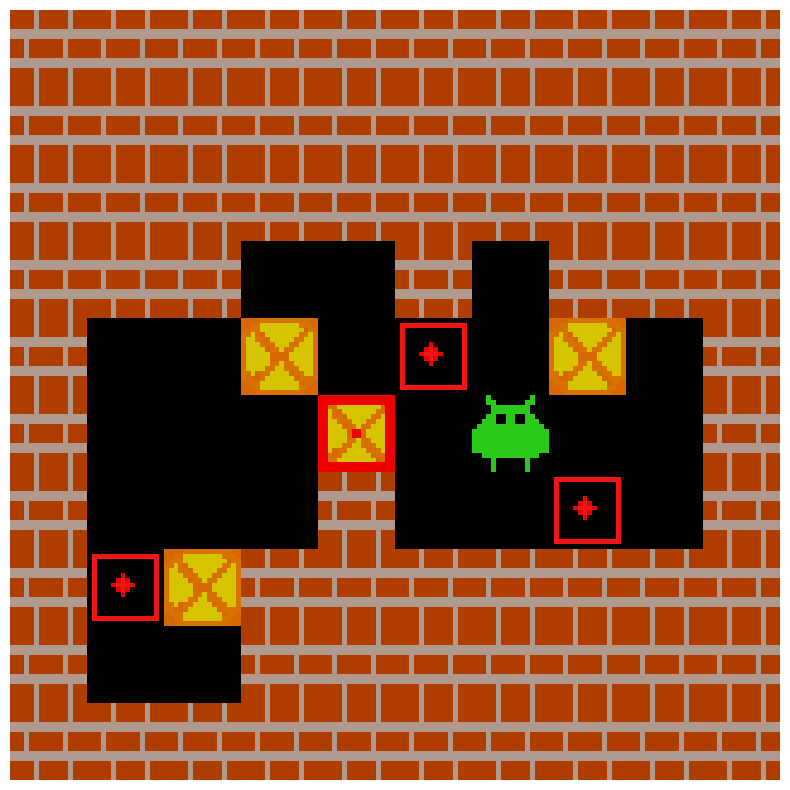

In [10]:
# Claude 3.7 Sonnet
# Question:     Can you give me a instruction set in the format "[RIGHT, DOWN, LEFT, UP, LEFT, UP]" to solve this Sokoban game?
# Attachment:   <Picture of start enviroment>
# Answer:       The image shows a Sokoban-style puzzle game with a brick wall background. The game elements include:
#
#               Black areas representing walls
#               A green character (appears to be a small android/robot)
#               Yellow squares with X marks that seem to be boxes/crates
#               Red squares with plus signs that appear to be targets/goals
#               
#               To solve this puzzle, I need to determine the sequence of moves to push all the yellow crates onto the red targets.
#               Looking at the current state, I can see several yellow crates and red targets positioned on a black background. The green android character is the player that needs to move the crates.
#               Here's my solution path:
#               [RIGHT, DOWN, LEFT, DOWN, RIGHT, RIGHT, UP, LEFT, DOWN, LEFT, UP, RIGHT, UP, LEFT, DOWN, RIGHT, RIGHT, UP, LEFT, LEFT, DOWN, RIGHT, UP, LEFT, DOWN, RIGHT, UP, LEFT, DOWN]
#               This sequence of moves should guide the green character to push all the yellow crates onto the red target squares, completing the Sokoban puzzle.

# Question:     Not all boxes are on the red goal markers. Can you refine the instruction set?
# Attachment:   <Picture of enviroment after intruction set>
# Answer:       The game has:
#               
#               A green character (looks like a frog or android)
#               Yellow boxes with X marks (crates that need to be pushed)
#               Red squares with plus signs (target locations)
#               Black areas (walls)
#               
#               Looking at the current state, I can see that there are 4 yellow crates and 4 red targets, but they're not aligned. Let me work through a proper solution step by step.
#               Here's my refined instruction set:
#               [RIGHT, RIGHT, UP, LEFT, DOWN, LEFT, UP, UP, RIGHT, DOWN, LEFT, DOWN, RIGHT, RIGHT, UP, LEFT, UP, LEFT, DOWN, RIGHT, DOWN, LEFT, UP, RIGHT, RIGHT, UP, LEFT, LEFT, DOWN, DOWN, RIGHT, UP, LEFT, UP, RIGHT, DOWN, DOWN, RIGHT, UP, UP, LEFT, DOWN, RIGHT, DOWN, LEFT, UP]
#               This sequence should guide the green character to push all the yellow crates onto the red target squares, successfully completing the Sokoban puzzle.

# Question:     Not all boxes are on the red goal markers. Can you refine the instruction set?
# Attachment:   <Picture of enviroment after intruction set>
# Answer:       I see the issue in this Sokoban puzzle. Looking at the current state, I can see that only one yellow crate is on a red target, while three others still need to be moved to their targets.
#               Let me analyze the layout more carefully:
#               
#               The green character (frog/android) is on the right side
#               One yellow crate is already on a red target (center)
#               Three yellow crates need to be moved to their respective targets
#               The layout has narrow passages and requires careful planning
#               
#               Let me trace a proper solution step by step:
#               [LEFT, DOWN, LEFT, LEFT, UP, RIGHT, RIGHT, DOWN, LEFT, UP, LEFT, DOWN, DOWN, RIGHT, UP, RIGHT, UP, LEFT, DOWN, LEFT, UP, UP, RIGHT, DOWN, LEFT, DOWN, RIGHT, RIGHT, UP, UP, LEFT, DOWN, RIGHT, DOWN, LEFT, LEFT, UP, RIGHT, RIGHT, UP, LEFT, LEFT, DOWN, LEFT, UP, RIGHT]
#               This sequence of moves should guide the green character to push all the yellow crates onto the red target squares, properly completing the Sokoban puzzle.

# second instruction set
doEpisode([RIGHT, RIGHT, UP, LEFT, DOWN, LEFT, UP, UP, RIGHT, DOWN, LEFT, DOWN, RIGHT, RIGHT, UP, LEFT, UP, LEFT, DOWN, RIGHT, DOWN, LEFT, UP, RIGHT, RIGHT, UP, LEFT, LEFT, DOWN, DOWN, RIGHT, UP, LEFT, UP, RIGHT, DOWN, DOWN, RIGHT, UP, UP, LEFT, DOWN, RIGHT, DOWN, LEFT, UP])